<a href="https://colab.research.google.com/github/manikur/R-programming/blob/main/SHARP_RATIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Evaluating the performance of a basic 1/n portfolio **

In [1]:
from numpy import *

In [2]:
import numpy as np

In [5]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 11.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=7b0c35b5e01497c736c84e934dfa6252e826289b340885ee4733b91e70ec701e
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import numpy as np
import pandas as pd
import pandas_datareader as web

In [6]:
import yfinance as yf

In [7]:
RISKY_ASSET = 'GOOG'
START_DATE = '2019-01-01'
END_DATE = '2021-07-24'

In [8]:
df= yf.download(RISKY_ASSET, start=START_DATE,
end=END_DATE, adjusted=True)

[*********************100%***********************]  1 of 1 completed


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-19,2623.110107,2624.939941,2570.739990,2585.080078,2585.080078,1285500
2021-07-20,2600.080078,2640.027100,2583.768066,2622.030029,2622.030029,954200
2021-07-21,2615.739990,2652.344971,2612.030029,2652.010010,2652.010010,736200
2021-07-22,2653.000000,2670.090088,2648.000000,2666.570068,2666.570068,679400
2021-07-23,2705.199951,2776.169922,2694.010010,2756.320068,2756.320068,1317200


Average return: 0.17%


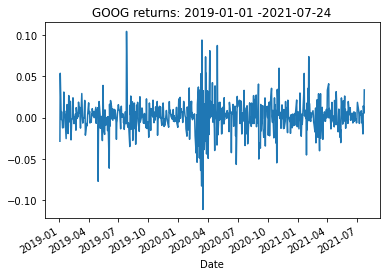

In [11]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()
print(f'Average return: {100 * returns.mean():.2f}%')
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} -{END_DATE}')

In [12]:
average(returns)

0.0016933033179170685

In [13]:
std(returns)

0.019359802968070956

In [14]:
df[ :2]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100


In [15]:
train = returns['2019-01-01':'2019-06-30']
test = returns['2019-07-01':'2019-07-31']

In [16]:
T = len(test)
N = len(test)

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
                


In [18]:
from datetime import datetime


In [19]:
S_0 = adj_close[train.index[-1]]

In [20]:
S_0

1080.9100341796875

In [21]:
N_SIM = 100
mu = train.mean()
sigma = train.std()

In [22]:
def simulate_gbm(s_0, mu, sigma, n_sims, T, N):
   dt = T/N

In [23]:
import math
import numpy as np
import pandas as pd
import scipy.stats as scs
import statsmodels.api as sm
import matplotlib as mpl
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**value-at-risk using Monte Carlo**

In [24]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns

In [25]:
RISKY_ASSETS = ['GOOG', 'FB']
SHARES = [5, 5]
START_DATE = '2018-01-01'
END_DATE = '2021-07-26'
T = 1
N_SIMS = 10 ** 5

In [26]:
df = yf.download(RISKY_ASSETS, start=START_DATE,
end=END_DATE, adjusted=True)

[*********************100%***********************]  2 of 2 completed


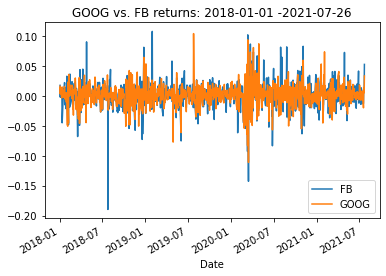

In [27]:
adj_close = df['Adj Close']
returns = adj_close.pct_change().dropna()
plot_title = f'{" vs. ".join(RISKY_ASSETS)} returns: {START_DATE} -{END_DATE}'
returns.plot(title=plot_title)

In [28]:
cov_mat = returns.cov()

In [29]:
chol_mat = np.linalg.cholesky(cov_mat)

In [30]:
rv = np.random.normal(size=(N_SIMS, len(RISKY_ASSETS)))
correlated_rv = np.transpose(np.matmul(chol_mat, np.transpose(rv)))

In [31]:
r = np.mean(returns, axis=0).values
sigma = np.std(returns, axis=0).values
S_0 = adj_close.values[-1, :]
P_0 = np.sum(SHARES * S_0)

In [32]:
S_T = S_0 * np.exp((r - 0.5 * sigma ** 2) * T +
sigma * np.sqrt(T) * correlated_rv)

In [33]:
P_T = np.sum(SHARES * S_T, axis=1)
P_diff = P_T - P_0

In [34]:
P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_diff_sorted, percentiles)

In [35]:
P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_diff_sorted, percentiles)

In [ ]:
#1-day VaR with 99.99% confidence: 8.49$
#1-day VaR with 99.9% confidence: 7.23$
#1-day VaR with 99.0% confidence: 5.78$

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


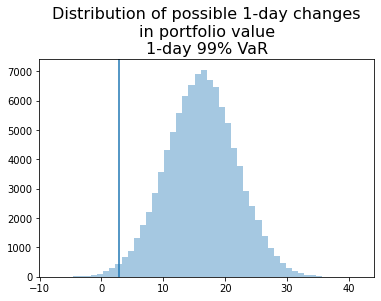

In [36]:
ax = sns.distplot(P_diff, kde=False)
ax.set_title('''Distribution of possible 1-day changes
in portfolio value
1-day 99% VaR''', fontsize=16)
ax.axvline(var[2], 0, 10000);

In [37]:
var = np.percentile(P_diff_sorted, 5)
expected_shortfall = P_diff_sorted[P_diff_sorted<=var].mean()

In [38]:
expected_shortfall

4.379930794969147

**Evaluating the performance of a basic 1/n portfolio
Finding the Efficient Frontier using Monte Carlo simulations
Finding the Efficient Frontier using optimization with scipy
Finding the Efficient Frontier using convex optimization with cvxpy**

In [39]:
!pip install pyfolio

     |████████████████████████████████| 91 kB 4.9 MB/s 
     |████████████████████████████████| 52 kB 1.2 MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-py3-none-any.whl size=88682 sha256=9057293efd0185ffb1106f9572e43d6fcf6ae56c2150238a478517e45f7ff935
  Stored in directory: /root/.cache/pip/wheels/e4/96/9b/0dfff5453e702fd780a099b7c850521099c5ec0dfafae189f9
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39779 sha256=f6776ad5e0fd8cb66b89c7c954c2abf8f0ca440fb2519f2c804236802e4b2582
  Stored in directory: /root/.cache/pip/wheels/d9/91/4b/654fcff57477efcf149eaca236da2fce991526cbab431bf312
Successfully built pyfolio empyrical


In [40]:
import yfinance as yf
import numpy as np
import pandas as pd
import pyfolio as pf

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [41]:
RISKY_ASSETS = ['AAPL', 'IBM', 'MSFT', 'TWTR']
START_DATE = '2017-01-01'
END_DATE = '2021-07-23'

In [42]:
n_assets = len(RISKY_ASSETS)

In [43]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE,
end=END_DATE, adjusted=True)

[*********************100%***********************]  4 of 4 completed


In [ ]:
#Calculate individual asset returns

In [44]:
returns = prices_df['Adj Close'].pct_change().dropna()

In [ ]:
returns.describe()

,AAPL,IBM,MSFT,TWTR
count,1145.000000,1145.000000,1145.000000,1145.000000
mean,0.001659,0.000172,0.001546,0.001789
std,0.019627,0.016907,0.017702,0.032248
min,-0.128647,-0.128507,-0.147390,-0.211139
25%,-0.006490,-0.006439,-0.005794,-0.012063
50%,0.001234,0.000512,0.001475,0.001847
75%,0.011117,0.007126,0.010006,0.015245
max,0.119808,0.113010,0.142169,0.184948


In [45]:
portfolio_weights = n_assets * [1 / n_assets]

In [46]:
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T),
index=returns.index)

In [ ]:
#Tearsheet

Start date,2017-01-04
End date,2021-07-22
Total months,54
,Backtest
Annual return,33.6%
Cumulative returns,272.5%
Annual volatility,26.7%
Sharpe ratio,1.22
Calmar ratio,1.03
Stability,0.94
Max drawdown,-32.7%


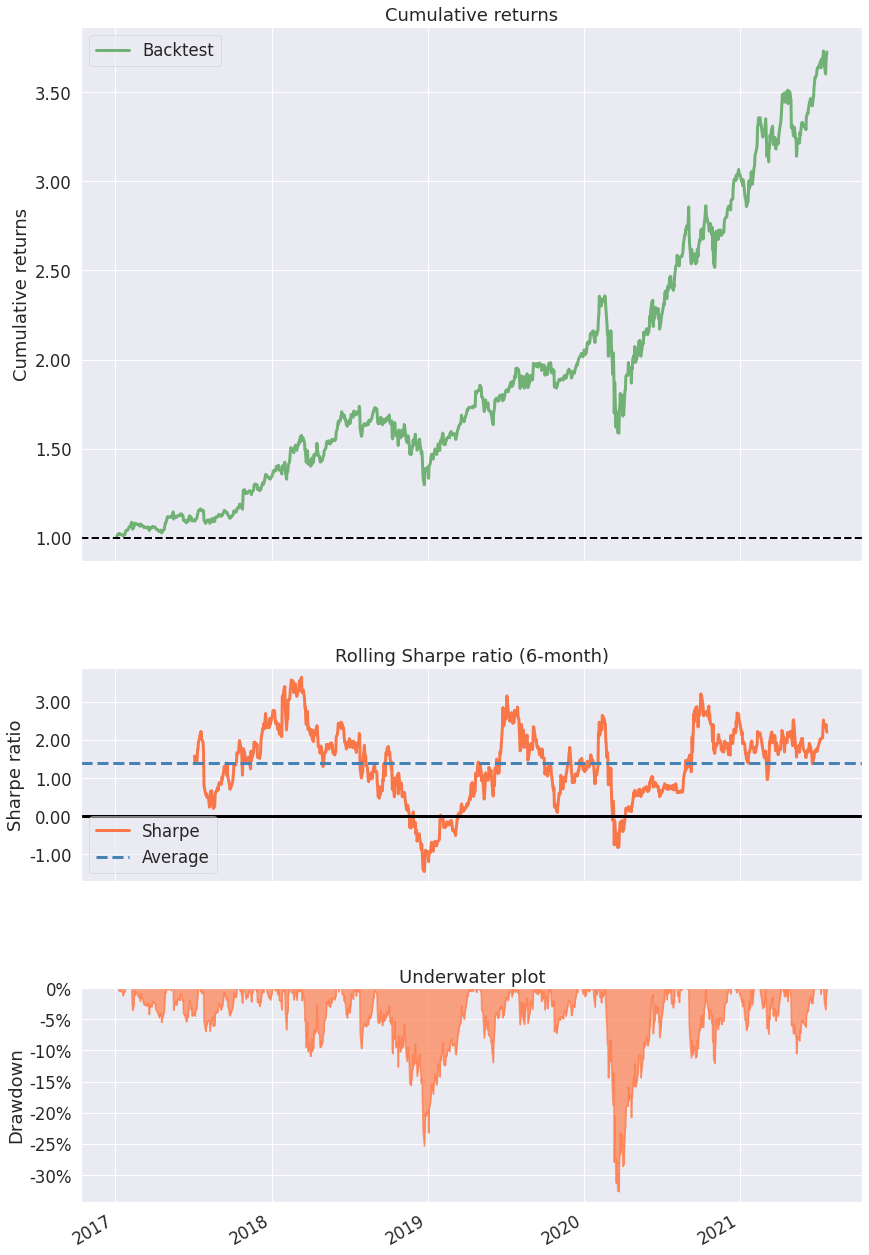

In [47]:
pf.create_simple_tear_sheet(portfolio_returns)

In [ ]:
#Efficient Frontier using Monte
 #Monte Carlo simulations

In [48]:
import yfinance as yf
import numpy as np
import pandas as pd

In [49]:
N_PORTFOLIOS = 10 ** 5
N_DAYS = 252
RISKY_ASSETS = ['FB', 'TSLA', 'TWTR', 'MSFT']
RISKY_ASSETS.sort()
START_DATE = '2018-01-01'
END_DATE = '2021-07-24'
n_assets = len(RISKY_ASSETS)

In [50]:
prices_df = yf.download(RISKY_ASSETS, start=START_DATE,
end=END_DATE, adjusted=True)

[*********************100%***********************]  4 of 4 completed


In [51]:
returns_df = prices_df['Adj Close'].pct_change().dropna()
avg_returns = returns_df.mean() * N_DAYS
cov_mat = returns_df.cov() * N_DAYS

In [52]:
np.random.seed(42)
weights = np.random.random(size=(N_PORTFOLIOS, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

In [53]:
portf_rtns = np.dot(weights, avg_returns)
portf_vol = []

In [54]:
for i in range(0, len(weights)):
 portf_vol.append(np.sqrt(np.dot(weights[i].T,
np.dot(cov_mat, weights[i]))))

In [55]:
portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

In [56]:
portf_results_df = pd.DataFrame({'returns': portf_rtns,
'volatility': portf_vol,
'sharpe_ratio':
portf_sharpe_ratio})

In [57]:
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []
portf_rtns_ef = np.linspace(portf_results_df.returns.min(),
portf_results_df.returns.max(),
N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)

In [58]:
for point_index in range(N_POINTS):
 if portf_rtns_ef[point_index] not in portf_rtns:
   indices_to_skip.append(point_index)
matched_ind = np.where(portf_rtns ==
portf_rtns_ef[point_index])
portf_vol_ef.append(np.min(portf_vol[matched_ind]))
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

In [59]:
MARKS = ['o', 'X', 'd', '*']

[Text(0, 0.5, 'Expected Returns'),
 Text(0.5, 0, 'Volatility'),
 Text(0.5, 1.0, 'Efficient Frontier')]

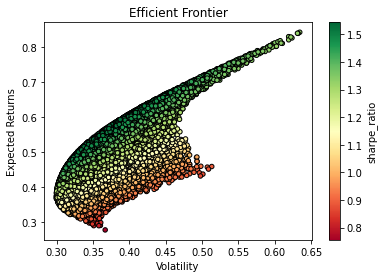

In [60]:
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility',
y='returns', c='sharpe_ratio',
cmap='RdYlGn', edgecolors='black',
ax=ax)
ax.set(xlabel='Volatility',
ylabel='Expected Returns',
title='Efficient Frontier')



In [ ]:
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')

ValueError: ignored

In [ ]:
for asset_index in range(n_assets):
 ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]),
  y=avg_returns[asset_index],
  marker=MARKS[asset_index],
 s=150,
 color='black',
 label=RISKY_ASSETS[asset_index])
ax.legend()